In [88]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [89]:
# Import plotting libraries
import matplotlib 
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 20})
plt.rcParams.update({'font.size': 22})

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

print(keras.__version__)
import numpy as np

print(np.__version__)
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


%load_ext autoreload
%autoreload 2


2.8.0
1.20.3
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
#Read Dataset
data = pd.read_csv('/Users/jasperz/Desktop/battery.csv')
data

,cell_id,study,Cycles,anode,cathode,electrolyte,Cycle,temperature,min_soc,max_soc,...,Test_Time (s),Min_Current (A),Max_Current (A),Min_Voltage (V),Max_Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Coulombic_Efficiency (%)
0,SNL_18650_LFP_15C_0-100_0.5-1C_a,snl,"4,551.00",0,0,0,50,15,0,100,...,587184.091,-1.1,0.55,1.998,3.6,1.036,1.033,3.495,3.213,99.710425
1,SNL_18650_LFP_15C_0-100_0.5-1C_a,snl,"4,551.00",0,0,0,100,15,0,100,...,1147865.412,-1.1,0.55,1.996,3.6,1.035,1.032,3.492,3.212,99.710145
2,SNL_18650_LFP_15C_0-100_0.5-1C_a,snl,"4,551.00",0,0,0,150,15,0,100,...,1707309.606,-1.1,0.55,1.998,3.6,1.034,1.031,3.488,3.210,99.709865
3,SNL_18650_LFP_15C_0-100_0.5-1C_a,snl,"4,551.00",0,0,0,200,15,0,100,...,2265641.077,-1.1,0.55,1.994,3.6,1.033,1.030,3.490,3.193,99.709584
4,SNL_18650_LFP_15C_0-100_0.5-1C_a,snl,"4,551.00",0,0,0,250,15,0,100,...,2823170.271,-1.1,0.55,1.998,3.6,1.031,1.028,3.495,3.169,99.709020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,SNL_18650_NMC_35C_0-100_0.5-2C_a,snl,786,0,2,2,300,35,0,100,...,2974479.443,-6.0,1.50,1.996,4.2,2.529,2.527,9.814,8.388,99.920917
316,SNL_18650_NMC_35C_0-100_0.5-2C_a,snl,786,0,2,2,350,35,0,100,...,3447094.374,-6.0,1.50,1.994,4.2,2.518,2.506,9.769,8.332,99.523431
317,SNL_18650_NMC_35C_0-100_0.5-2C_a,snl,786,0,2,2,400,35,0,100,...,3950131.055,-6.0,1.50,1.995,4.2,2.484,2.482,9.650,8.197,99.919485
318,SNL_18650_NMC_35C_0-100_0.5-2C_a,snl,786,0,2,2,450,35,0,100,...,4424376.521,-6.0,1.50,1.995,4.2,2.477,2.478,9.617,8.208,100.040371


In [81]:
#Split Dataset
X = data[["cathode", "electrolyte", "Cycle", "temperature", "discharge_crate"]]
y = data[["Discharge_Energy (Wh)"]]
type(y)

pandas.core.frame.DataFrame

In [91]:
#Sclaer test set
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_scaler = StandardScaler().fit(X_train_pn)
X_train = X_train_scaler.transform(X_train_pn)

In [92]:
X_train_scaler = StandardScaler().fit(X_train_pn)
X_train = X_train_scaler.transform(X_train_pn)

In [93]:
#Define sn
def sn():
    model = Sequential()
    model.add(Dense(6, input_dim = 5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12,activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

mymodel = sn()
mymodel.summary()

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_364 (Dense)           (None, 6)                 36        
                                                                 
 dense_365 (Dense)           (None, 12)                84        
                                                                 
 dense_366 (Dense)           (None, 8)                 104       
                                                                 
 dense_367 (Dense)           (None, 1)                 9         
                                                                 
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [94]:
#Define estimator
estimator = KerasRegressor(build_fn=sn, validation_split=0.33, epochs=190, batch_size=30, verbose=0)

/var/folders/4x/0gkbgs9d6tj2xphl99ymwrqw0000gn/T/ipykernel_5826/3062809654.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=sn, validation_split=0.33, epochs=190, batch_size=30, verbose=0)


In [95]:
#Train Data
history = estimator.fit(X_train, y_train, validation_split = 0.33, epochs=190, batch_size=30, verbose=0)

In [96]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [97]:
print("final MSE for train is %.2f and for validation is %.2f" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))

final MSE for train is 27.95 and for validation is 28.46


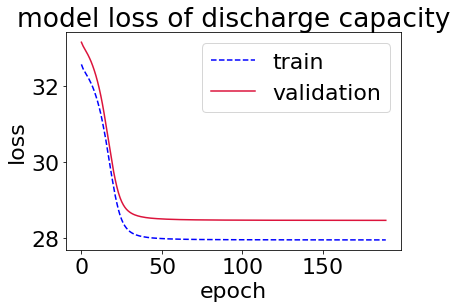

In [98]:
plt.plot(history.history['loss'], '--', c='b')
plt.plot(history.history['val_loss'], c='crimson')
plt.title('model loss of discharge capacity')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [100]:
#Define K-fold
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (-1 * results.mean(), results.std()))

Results: 28.12 (5.07) MSE


In [113]:
import tensorflow as tf 
def medium_network():
 
    model = Sequential()
    model.add(Dense(600, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(120, kernel_initializer='normal', activation='relu'))
    model.add(Dense(120,activation='relu'))
    model.add(Dense(120, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    opt = tf.keras.optimizers.Adam(learning_rate=0.9)
    
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
    return model

In [114]:
my_model = medium_network()
my_model.summary()

Model: "sequential_119"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_519 (Dense)           (None, 600)               3600      
                                                                 
 dense_520 (Dense)           (None, 120)               72120     
                                                                 
 dense_521 (Dense)           (None, 120)               14520     
                                                                 
 dense_522 (Dense)           (None, 120)               14520     
                                                                 
 dense_523 (Dense)           (None, 1)                 121       
                                                                 
 dense_524 (Dense)           (None, 1)                 2         
                                                                 
Total params: 104,883
Trainable params: 104,883
Non-

In [115]:
# Set random seed
# Create the NN framework
estimator = KerasRegressor(build_fn=medium_network,
        epochs=150, batch_size=10000, verbose=0)
# Fit to training data
history = estimator.fit(X_train, y_train, validation_split=0.30, epochs=150, 
        batch_size=10000, verbose=0)

print("Final MSE for train is %.3e and for validation is %.3e" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))

/var/folders/4x/0gkbgs9d6tj2xphl99ymwrqw0000gn/T/ipykernel_5826/2462997206.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=medium_network,


Final MSE for train is 9.078e+00 and for validation is 8.227e+00


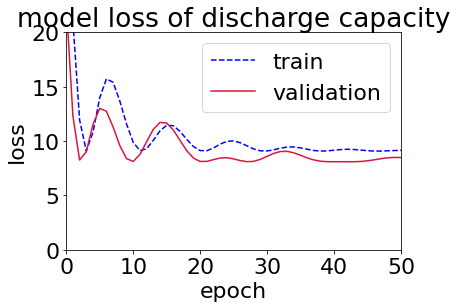

In [116]:
plt.plot(history.history['loss'],'--',c='b')
plt.plot(history.history['val_loss'],c='crimson')
plt.title('model loss of discharge capacity')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([0,50])
plt.ylim([0,20])
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [117]:
test_loss = estimator.model.evaluate(X_test_pn, y_test)
print(test_loss)

3/3 [==============================] - 0s 3ms/step - loss: 8.6802 - accuracy: 0.0000e+00
[8.680193901062012, 0.0]


In [118]:
y2 = data[["Charge_Energy (Wh)"]]

In [124]:
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, y2, test_size=0.25, random_state=42)

X_train_scaler = StandardScaler().fit(X_train_pn)


X_train = X_train_scaler.transform(X_train_pn)

In [125]:
estimator = KerasRegressor(build_fn=medium_network,
        epochs=150, batch_size=10000, verbose=0)
# Fit to training data
history = estimator.fit(X_train, y_train, validation_split=0.30, epochs=150, 
        batch_size=10000, verbose=0)

print("Final MSE for train is %.3e and for validation is %.3e" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))


/var/folders/4x/0gkbgs9d6tj2xphl99ymwrqw0000gn/T/ipykernel_5826/2906443657.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=medium_network,


Final MSE for train is 1.283e+01 and for validation is 1.232e+01


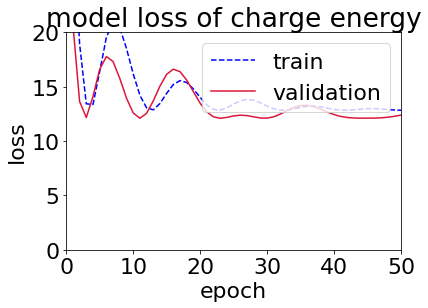

In [126]:
plt.plot(history.history['loss'],'--',c='b')
plt.plot(history.history['val_loss'],c='crimson')
plt.title('model loss of charge energy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([0,50])
plt.ylim([0,20])
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [134]:
y3 = data[["Discharge_Energy (Wh)"]]

In [129]:
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, y3, test_size=0.25, random_state=42)

X_train_scaler = StandardScaler().fit(X_train_pn)


X_train = X_train_scaler.transform(X_train_pn)

In [130]:
estimator = KerasRegressor(build_fn=medium_network,
        epochs=150, batch_size=10000, verbose=0)
# Fit to training data
history = estimator.fit(X_train, y_train, validation_split=0.30, epochs=150, 
        batch_size=10000, verbose=0)

print("Final MSE for train is %.3e and for validation is %.3e" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))


/var/folders/4x/0gkbgs9d6tj2xphl99ymwrqw0000gn/T/ipykernel_5826/2906443657.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=medium_network,


Final MSE for train is 9.078e+00 and for validation is 8.227e+00


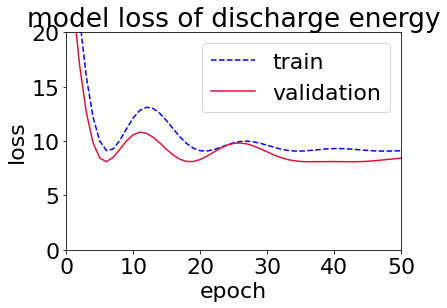

In [131]:
plt.plot(history.history['loss'],'--',c='b')
plt.plot(history.history['val_loss'],c='crimson')
plt.title('model loss of discharge energy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([0,50])
plt.ylim([0,20])
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [133]:
y4 = data[["Coulombic_Efficiency (%)"]]

In [136]:
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, y4, test_size=0.25, random_state=42)

X_train_scaler = StandardScaler().fit(X_train_pn)


X_train = X_train_scaler.transform(X_train_pn)

In [137]:
estimator = KerasRegressor(build_fn=medium_network,
        epochs=150, batch_size=10000, verbose=0)
# Fit to training data
history = estimator.fit(X_train, y_train, validation_split=0.30, epochs=150, 
        batch_size=10000, verbose=0)

print("Final MSE for train is %.3e and for validation is %.3e" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))


/var/folders/4x/0gkbgs9d6tj2xphl99ymwrqw0000gn/T/ipykernel_5826/2906443657.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=medium_network,


Final MSE for train is 1.228e+02 and for validation is 1.155e+02


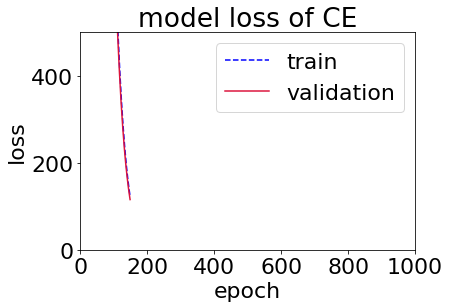

In [141]:
plt.plot(history.history['loss'],'--',c='b')
plt.plot(history.history['val_loss'],c='crimson')
plt.title('model loss of CE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([0,1000])
plt.ylim([0,500])
plt.legend(['train', 'validation'], loc='upper right')
plt.show()